1. Importar las bibliotecas necesarias 
2. Cargar el conjunto de datos 
3. Explorar la información del conjunto de datos (variables, tipos, cantidad, definiciones, etc)
4. Visualizar la distribución de las variables
5. Explorar la relación entre las variables 
6. Arreglar valores nulos y outliers 
7. Codificar las variables no numéricas 
8. Estandarizar (o normalizar) las variables en las que sea necesario

1. Importar las bibliotecas necesarias 

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Cargar el conjunto de datos 

In [55]:
ruta_archivo = 'abalone_original.csv'  

df_abalone = pd.read_csv(ruta_archivo)

* Acerca del conjunto de datos
* Contexto

Abalon es el nombre común para cualquier grupo de caracoles marinos pequeños a muy grandes, que se encuentran comúnmente a lo largo de las costas de todo el mundo y se usan como manjar en la cocina y su caparazón sobrante se transforma en joyería debido a su brillo iridiscente. Debido a su demanda y valor económico, a menudo se cosecha en granjas y, como tal, es necesario predecir la edad del abalon a partir de mediciones físicas. El método tradicional para determinar su edad es cortar la cáscara a través del cono, teñirla y contar el número de anillos a través de un microscopio, una tarea aburrida y que requiere mucho tiempo.

* Descripción de datos

De los datos originales se eliminaron ejemplos con valores faltantes (a la mayoría les faltaba el valor predicho)
y los rangos de los valores continuos se escalaron para su uso con una ANN (dividiendo por 200).

Número de instancias: 4177

Número de atributos: 8

Características: Sexo, Longitud, Diámetro, Altura, Peso total, Peso desbullado, Peso de las vísceras
y Peso de la concha.

Objetivo: Anillos

3. Explorar la información del conjunto de datos (variables, tipos, cantidad, definiciones, etc)

In [56]:
df_abalone.head()


,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7


In [57]:
df_abalone.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   int64  
 2   diameter        4177 non-null   int64  
 3   height          4177 non-null   int64  
 4   whole-weight    4177 non-null   float64
 5   shucked-weight  4177 non-null   float64
 6   viscera-weight  4177 non-null   float64
 7   shell-weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 293.8+ KB


In [58]:
df_abalone.select_dtypes(exclude = 'object').describe().T

,count,mean,std,min,25%,50%,75%,max
length,4177.0,104.798420,24.018583,15.0,90.0,109.0,123.0,163.0
diameter,4177.0,81.576251,19.847973,11.0,70.0,85.0,96.0,130.0
height,4177.0,27.903280,8.365411,0.0,23.0,28.0,33.0,226.0
whole-weight,4177.0,165.748432,98.077804,0.4,88.3,159.9,230.6,565.1
shucked-weight,4177.0,71.873498,44.392590,0.2,37.2,67.2,100.4,297.6
viscera-weight,4177.0,36.118722,21.922850,0.1,18.7,34.2,50.6,152.0
shell-weight,4177.0,47.766172,27.840534,0.3,26.0,46.8,65.8,201.0
rings,4177.0,9.933684,3.224169,1.0,8.0,9.0,11.0,29.0


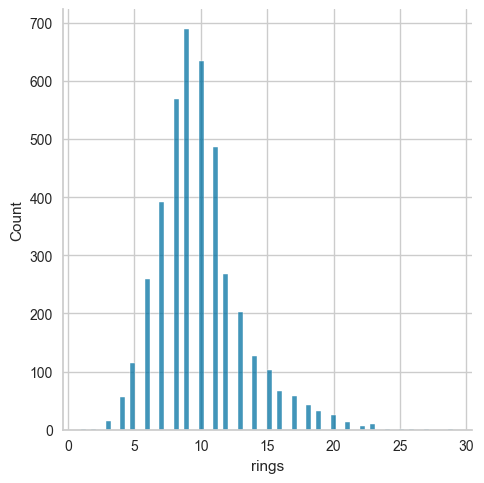

In [59]:
sns.displot(df_abalone['rings'])

In [60]:
df_abalone['sex'].value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [61]:
df_abalone['sex'] = df_abalone['sex'].map({'M': 1, 'F': 2, 'I': 3})

In [62]:
df_abalone.head()

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,1,91,73,19,102.8,44.9,20.2,30.0,15
1,1,70,53,18,45.1,19.9,9.7,14.0,7
2,2,106,84,27,135.4,51.3,28.3,42.0,9
3,1,88,73,25,103.2,43.1,22.8,31.0,10
4,3,66,51,16,41.0,17.9,7.9,11.0,7


4. Visualizar la distribución de las variables

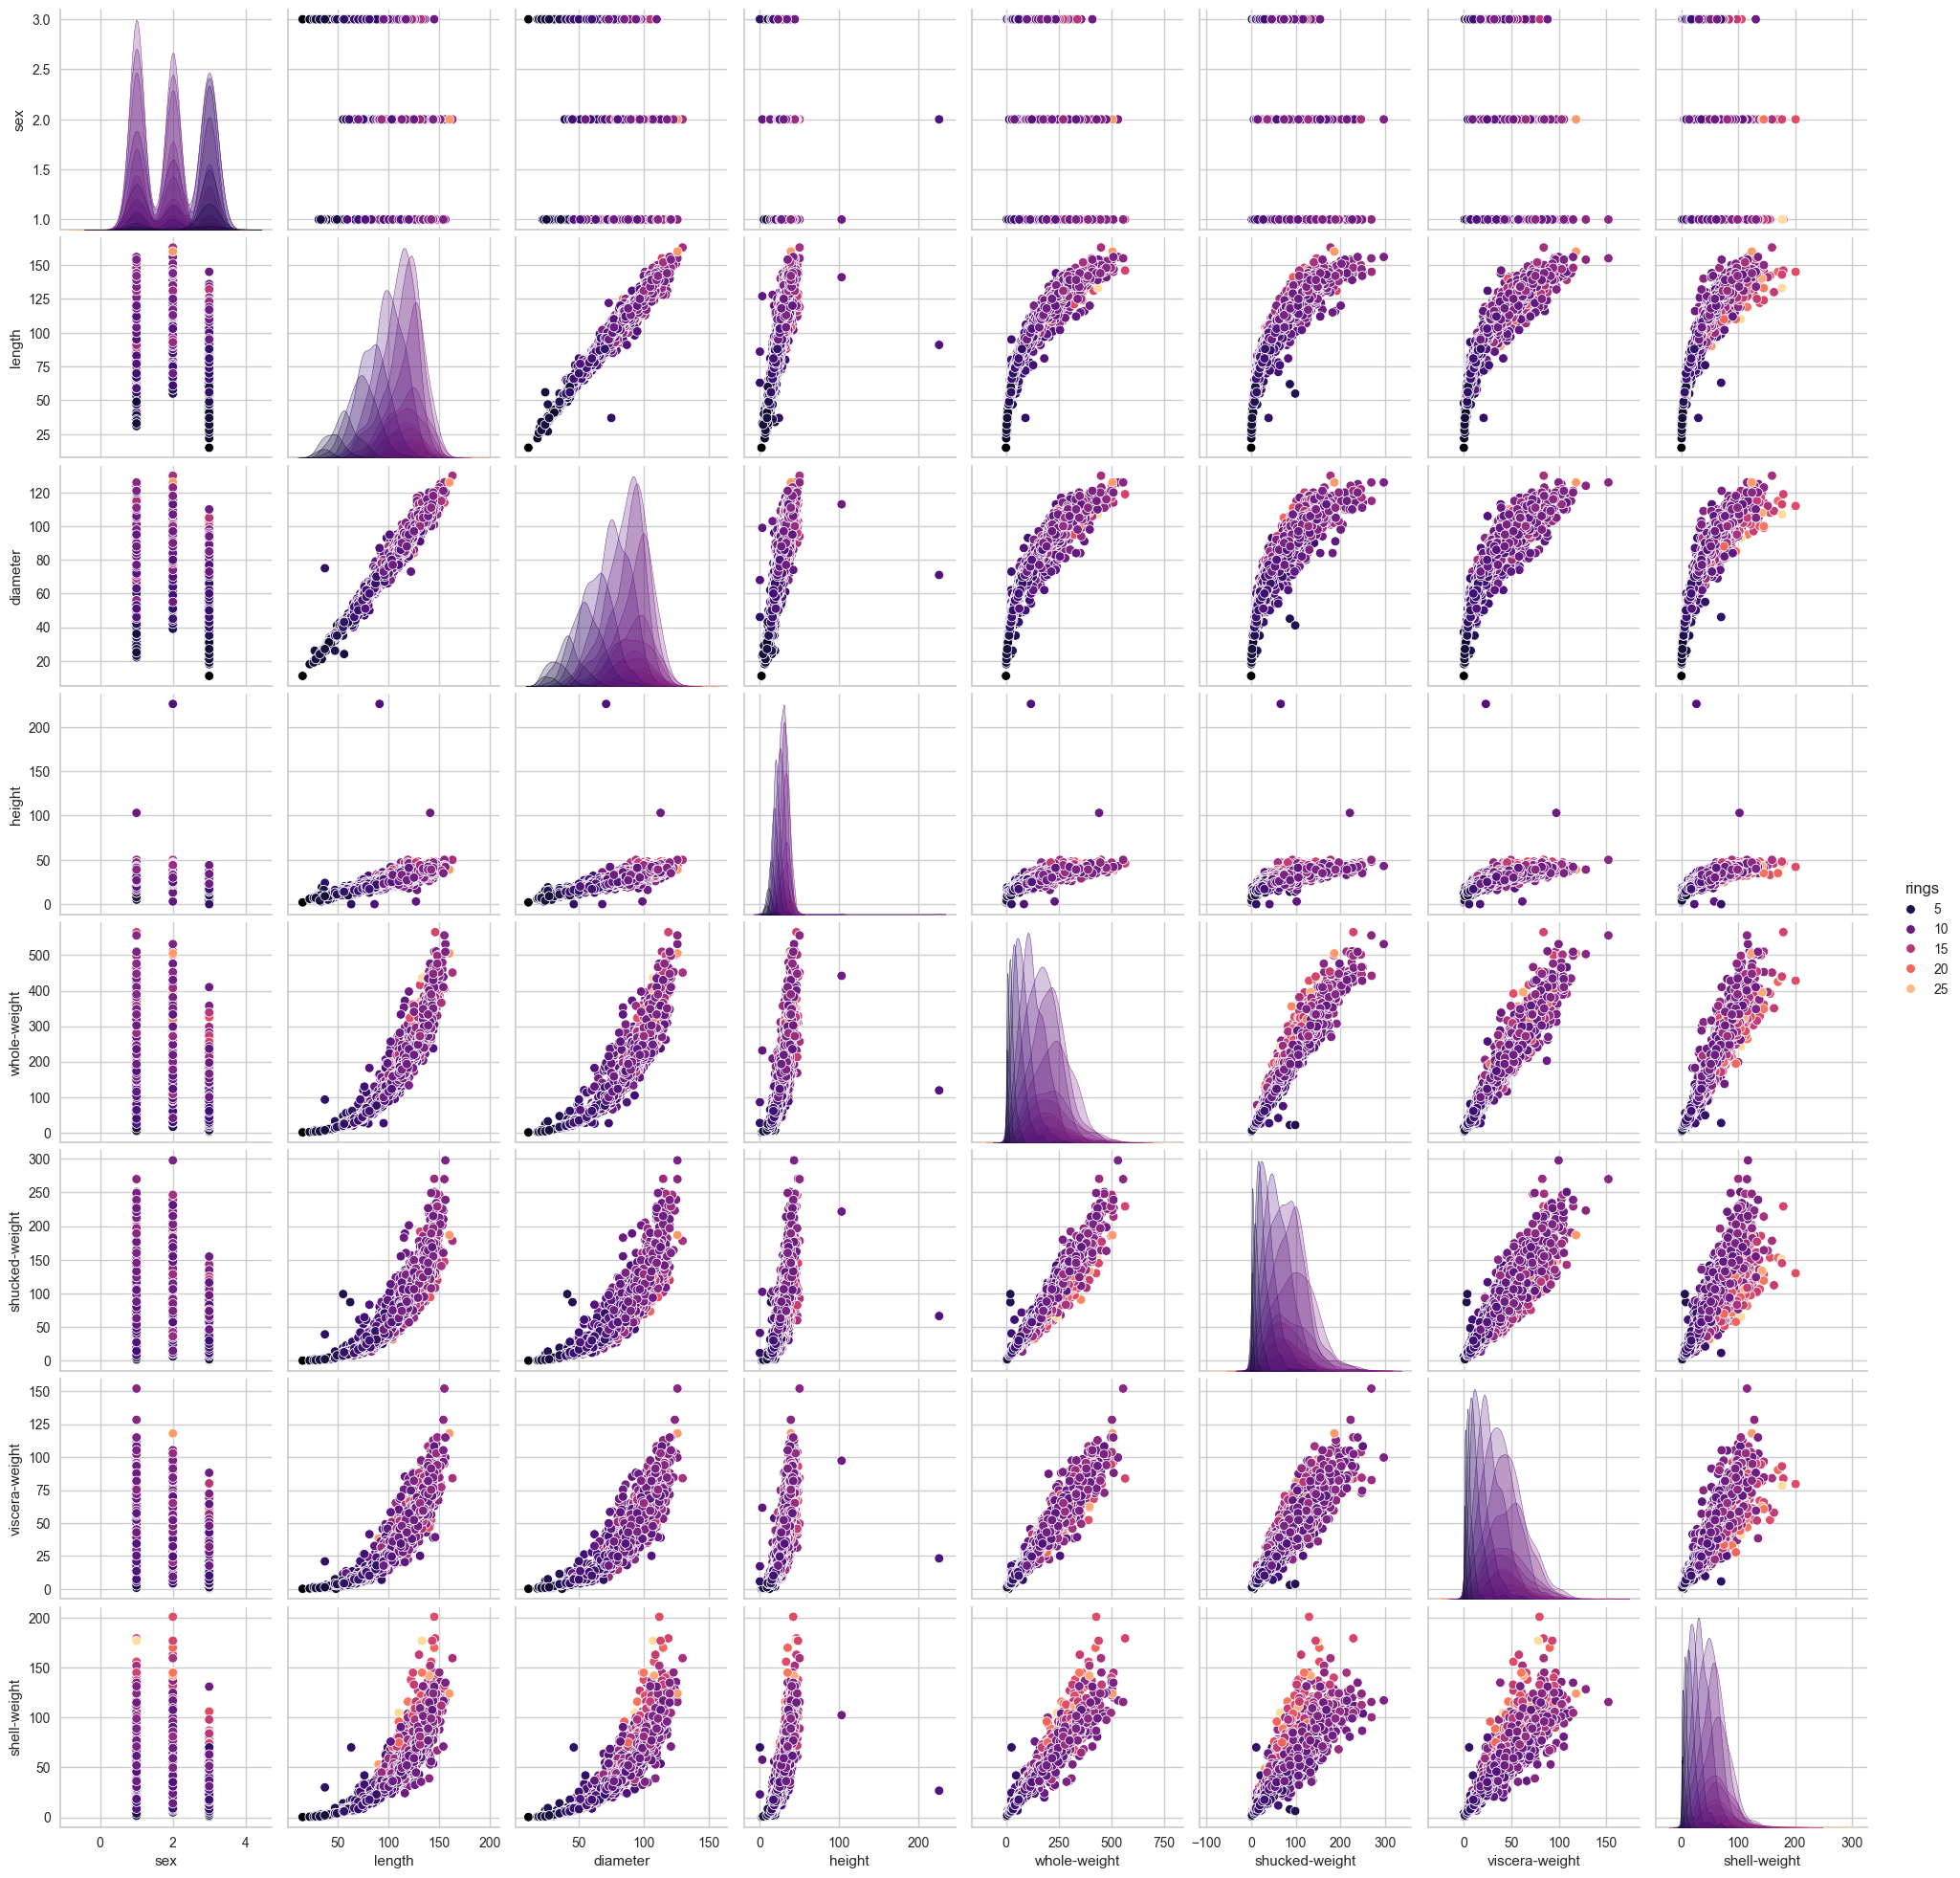

In [63]:
sns.pairplot(df_abalone, diag_kind='kde', hue='rings', palette='magma')

5. Explorar la relación entre las variables 

In [64]:
pearson= df_abalone.corr(method = 'pearson').sort_values(by = 'rings', axis = 0).sort_values(by = 'rings', axis = 1)

In [65]:
pearson

,sex,shucked-weight,viscera-weight,whole-weight,length,height,diameter,shell-weight,rings
sex,1.000000,-0.440927,-0.454658,-0.461238,-0.448765,-0.417928,-0.458245,-0.445549,-0.351822
shucked-weight,-0.440927,1.000000,0.931961,0.969405,0.897914,0.774972,0.893162,0.882617,0.420884
viscera-weight,-0.454658,0.931961,1.000000,0.966375,0.903018,0.798319,0.899724,0.907656,0.503819
whole-weight,-0.461238,0.969405,0.966375,1.000000,0.925261,0.819221,0.925452,0.955355,0.540390
length,-0.448765,0.897914,0.903018,0.925261,1.000000,0.827554,0.986812,0.897706,0.556720
height,-0.417928,0.774972,0.798319,0.819221,0.827554,1.000000,0.833684,0.817338,0.557467
diameter,-0.458245,0.893162,0.899724,0.925452,0.986812,0.833684,1.000000,0.905330,0.574660
shell-weight,-0.445549,0.882617,0.907656,0.955355,0.897706,0.817338,0.905330,1.000000,0.627574
rings,-0.351822,0.420884,0.503819,0.540390,0.556720,0.557467,0.574660,0.627574,1.000000


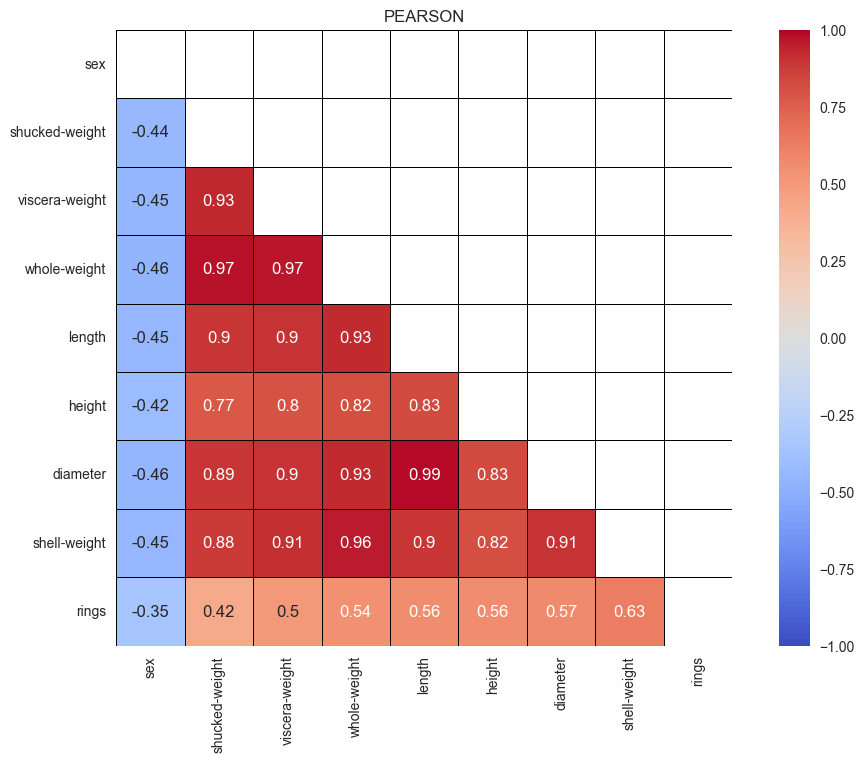

In [66]:
mask = np.triu(np.ones_like(pearson, dtype= bool))

plt.figure(figsize=(12,8))
sns.heatmap(pearson, vmax=1, vmin=-1, annot = True, square=True, linewidths=0.5, cmap="coolwarm", linecolor="black", mask=mask )
plt.title("PEARSON")
plt.show()

Variable Shell-Weight en funcion de rings

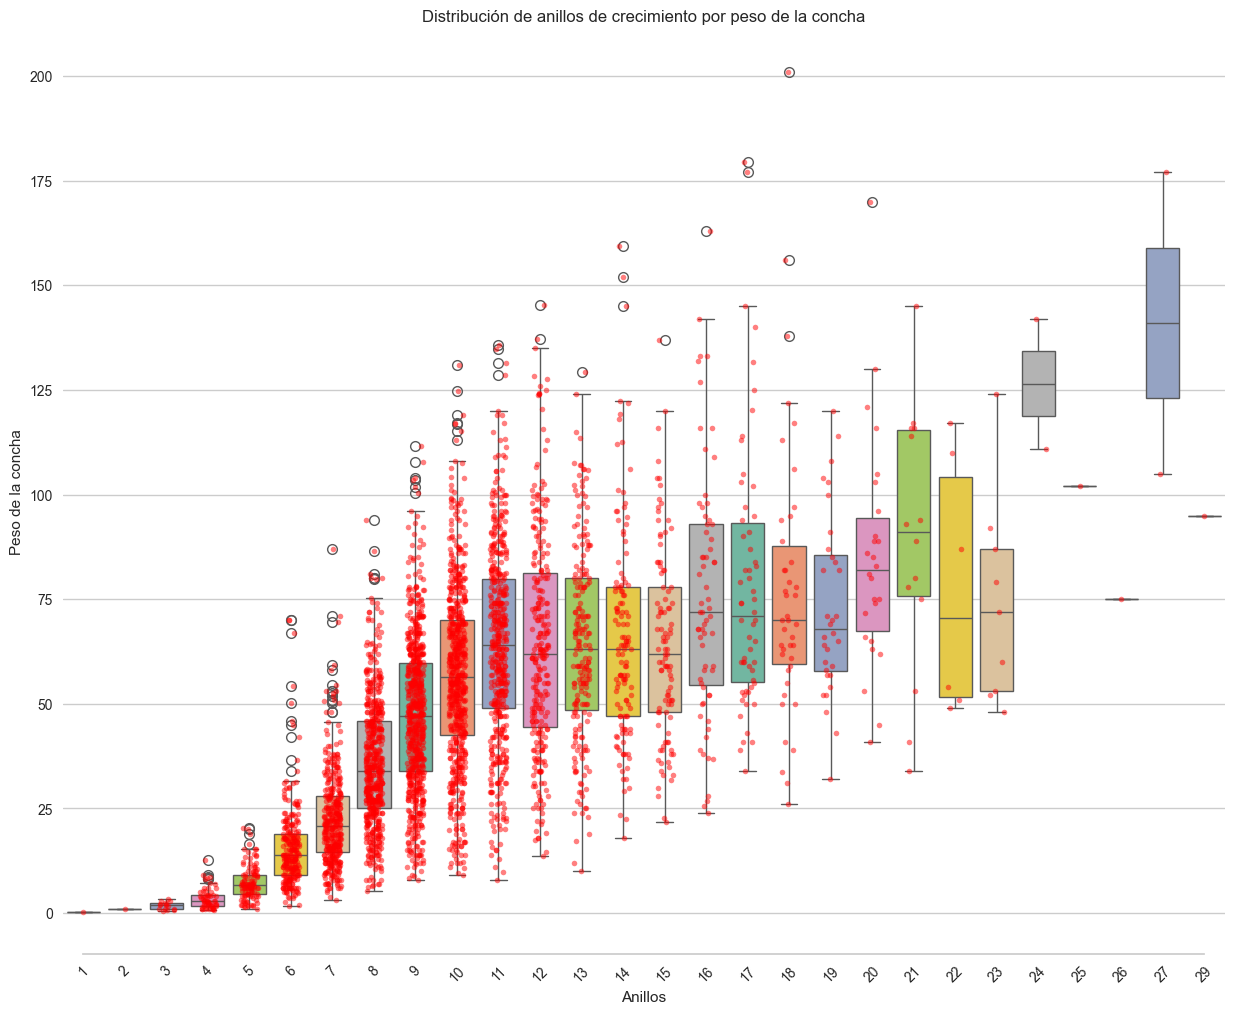

In [82]:

sns.set_style("whitegrid")

plt.figure(figsize=(15, 12))

sns.boxplot(data=df_abalone, x='rings', y='shell-weight', palette="Set2")
plt.title("Distribución de anillos de crecimiento por peso de la concha")

plt.xlabel("Anillos")
plt.ylabel("Peso de la concha")

sns.despine(trim=True, left=True)
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mayor legibilidad

sns.stripplot(data=df_abalone, x='rings', y='shell-weight', color='red', jitter=0.2, size=4, alpha=0.5)

# Muestra la gráfica de caja mejorada
plt.show()

In [68]:
from scipy import stats
numeric_vars = ['shell-weight', 'diameter', 'height', 'length', 'whole-weight', 'viscera-weight', 'shucked-weight', 'sex']
# Check the skew of all numerical features
skewed_feats = df_abalone.loc[:,numeric_vars].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
print(skewness.head())

                    Skew
height          3.127694
shucked-weight  0.718840
shell-weight    0.620704
viscera-weight  0.591640
whole-weight    0.530768


In [69]:
from scipy.special import boxcox1p #Librería
skewness = skewness.loc[abs(skewness.Skew) > 0.75,:] #Filtramos los que tengan un índice superior a .75
lambda_values = pd.Series(np.linspace(-2,2,40)) #Asignamos candidatos a índices de transformación
for var in skewness.index:
  skews = [stats.skew(boxcox1p(df_abalone[var], lam)) for lam in lambda_values]
  lam = lambda_values[pd.Series(np.abs(skews)).idxmin()] #Elegimos el índice óptimo
  df_abalone[var] = boxcox1p(df_abalone[var], lam)

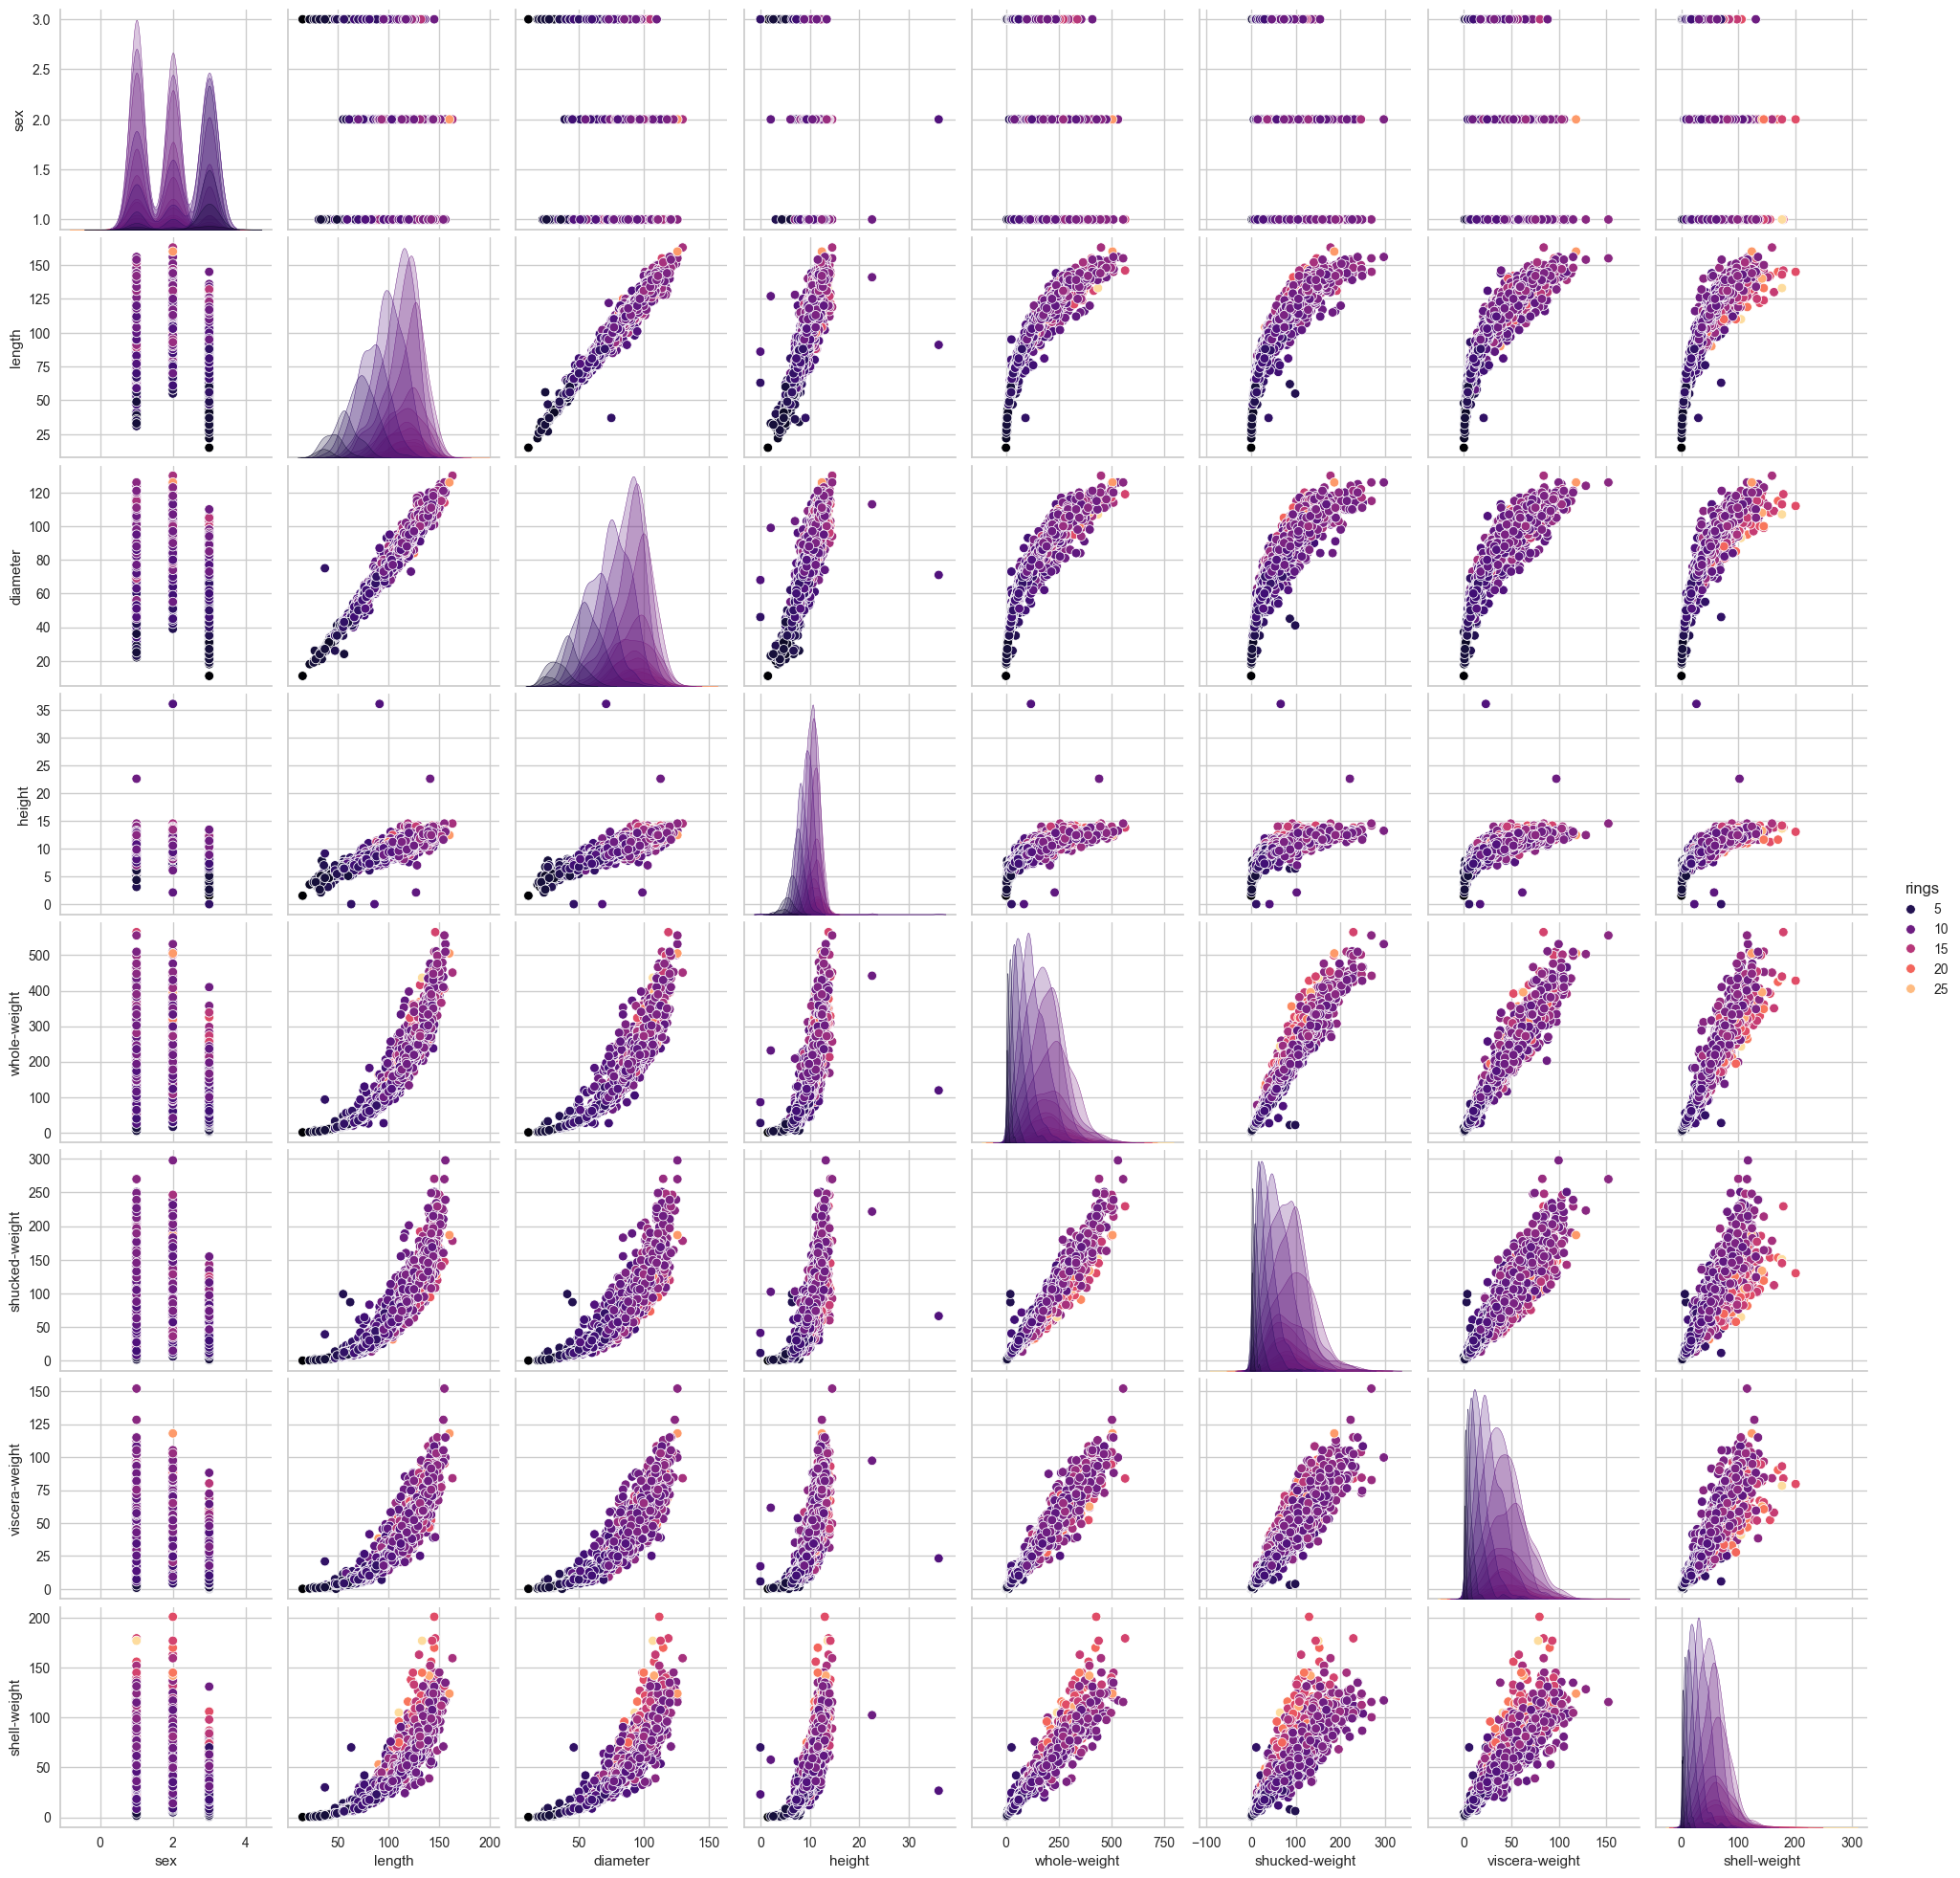

In [70]:
sns.pairplot(df_abalone, diag_kind='kde', hue='rings', palette='magma')

6. Outliers 

In [71]:
from scipy.stats import zscore 
z_scores = df_abalone.apply(zscore)
outliers = z_scores[(z_scores > 1.5).any(axis=1) |  (z_scores < -1.5).any(axis=1)]

In [72]:
outliers

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,-1.154346,-0.574558,-0.432149,-1.091351,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
4,1.261943,-1.615544,-1.540707,-1.529549,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013
6,0.053798,0.050033,0.071741,0.311587,-0.104505,-0.551363,-0.356690,0.655017,3.122516
7,0.053798,0.174951,0.172519,-0.293426,-0.123880,-0.294533,-0.283698,0.152092,1.881738
9,0.053798,0.216591,0.323686,0.311587,0.134109,-0.202164,-0.270012,0.583170,2.812322
...,...,...,...,...,...,...,...,...,...
4150,1.261943,-1.615544,-1.792652,-1.529549,-1.404649,-1.364659,-1.314709,-1.385418,-0.910013
4151,1.261943,-1.448986,-1.591096,-1.682994,-1.344486,-1.243003,-1.323833,-1.421342,-1.220208
4162,-1.154346,-1.157510,-1.540707,-0.951763,-1.042648,-1.001942,-1.027303,-1.054925,-0.599818
4174,-1.154346,0.632985,0.676409,1.508435,0.708212,0.748559,0.975413,0.496955,-0.289624


In [73]:
from sklearn.ensemble import IsolationForest

In [74]:
aislamiento = IsolationForest(contamination=0.1)
predicciones = aislamiento.fit_predict(df_abalone)

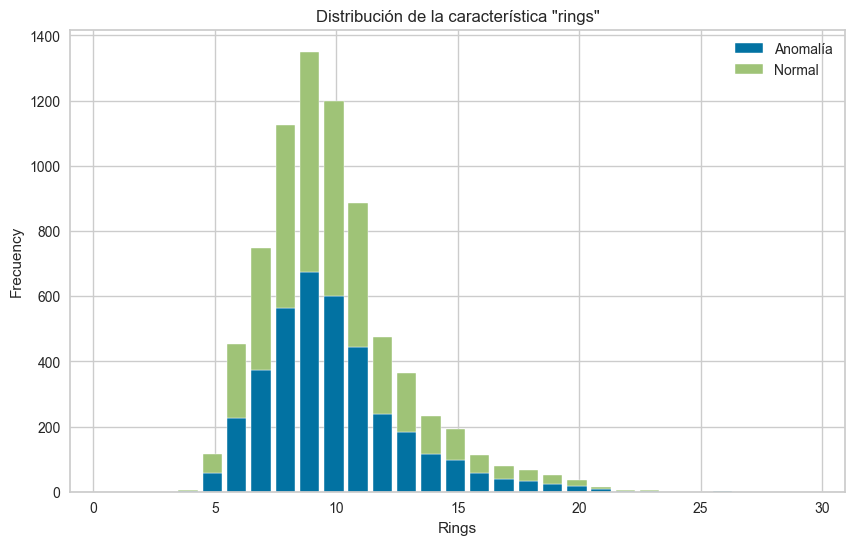

In [78]:
caracteristica = "rings"

# Crear bins que coincidan con los números del eje x
bins = np.arange(df_abalone[caracteristica].min() - 0.5, df_abalone[caracteristica].max() + 1.5, 1)

plt.figure(figsize=(10,6))
plt.hist([df_abalone.loc[df_abalone['outliers'] != -1, caracteristica], df_abalone.loc[df_abalone['outliers'] == 1, caracteristica]],
         bins=bins, stacked=True, label=['Anomalía', 'Normal'], width=0.8)  # Ajustar el ancho de las barras
plt.title('Distribución de la característica "{}"'.format(caracteristica))
plt.xlabel('Rings')
plt.ylabel('Frecuency')
plt.legend()
plt.show()

7. Codificar las variables no numéricas 

realizado para 'sex' con diccionario

8. Estandarizar (o normalizar) las variables en las que sea necesario

In [83]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas que deseas estandarizar
columnas_a_estandarizar = ['length', 'diameter', 'height', 'whole-weight', 'shucked-weight', 'viscera-weight', 'shell-weight', 'rings']

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Aplicar la estandarización solo a las columnas seleccionadas
df_abalone[columnas_a_estandarizar] = scaler.fit_transform(df_abalone[columnas_a_estandarizar])

In [84]:
df_abalone

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings,outliers
0,1,-0.574558,-0.432149,-1.091351,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,1
1,1,-1.448986,-1.439929,-1.234015,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,1
2,2,0.050033,0.122130,-0.045814,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,1
3,1,-0.699476,-0.432149,-0.293426,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,1
4,3,-1.615544,-1.540707,-1.529549,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,1
...,...,...,...,...,...,...,...,...,...,...
4172,2,0.341509,0.424464,0.654197,0.118813,0.047908,0.532900,0.073062,0.330765,1
4173,1,0.549706,0.323686,-0.045814,0.279929,0.358808,0.309362,0.155685,0.020571,1
4174,1,0.632985,0.676409,1.508435,0.708212,0.748559,0.975413,0.496955,-0.289624,1
4175,2,0.841182,0.777187,0.311587,0.541998,0.773341,0.733627,0.410739,0.020571,1


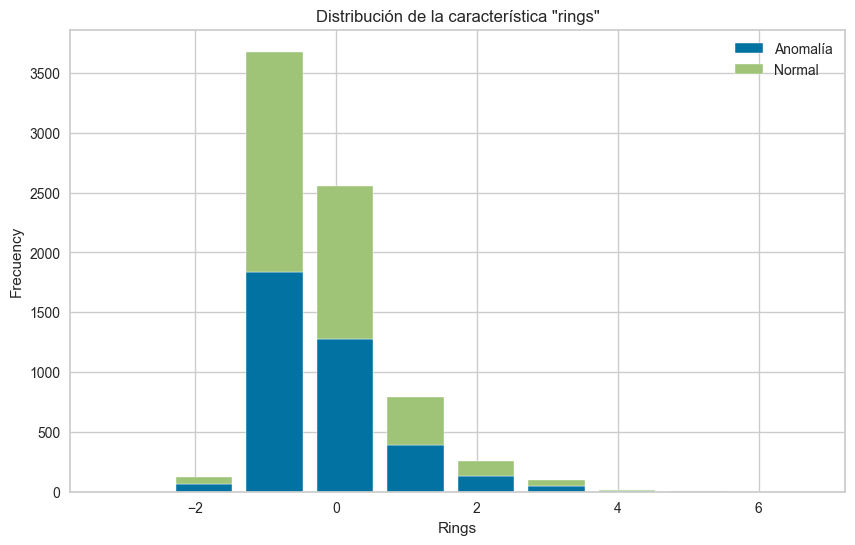

In [91]:
df_abalone["outliers"] = predicciones
caracteristica = "rings"

# Crear bins que coincidan con los números del eje x
bins = np.arange(df_abalone[caracteristica].min() - 0.5, df_abalone[caracteristica].max() + 1.5, 1)

plt.figure(figsize=(10,6))
plt.hist([df_abalone.loc[df_abalone['outliers'] != -1, caracteristica], df_abalone.loc[df_abalone['outliers'] == 1, caracteristica]],
         bins=bins, stacked=True, label=['Anomalía', 'Normal'], width=0.8)  # Ajustar el ancho de las barras
plt.title('Distribución de la característica "{}"'.format(caracteristica))
plt.xlabel('Rings')
plt.ylabel('Frecuency')
plt.legend()
plt.show()

In [26]:
from pycaret.regression import *

In [41]:
df_abalone

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings,outliers
0,1,-0.574558,-0.432149,-1.091351,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,1
1,1,-1.448986,-1.439929,-1.234015,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,1
2,2,0.050033,0.122130,-0.045814,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,1
3,1,-0.699476,-0.432149,-0.293426,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,1
4,3,-1.615544,-1.540707,-1.529549,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,1
...,...,...,...,...,...,...,...,...,...,...
4172,2,0.341509,0.424464,0.654197,0.118813,0.047908,0.532900,0.073062,0.330765,1
4173,1,0.549706,0.323686,-0.045814,0.279929,0.358808,0.309362,0.155685,0.020571,1
4174,1,0.632985,0.676409,1.508435,0.708212,0.748559,0.975413,0.496955,-0.289624,1
4175,2,0.841182,0.777187,0.311587,0.541998,0.773341,0.733627,0.410739,0.020571,1


In [42]:
df_abalone.drop(columns=['outliers'], inplace=True)

In [43]:
df_abalone["rings"] = df_abalone.rings

In [44]:
regexperiment = setup(df_abalone, target="rings")

,Description,Value
0,Session id,2721
1,Target,rings
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 9)"
5,Transformed train set shape,"(2923, 9)"
6,Transformed test set shape,"(1254, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [45]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:35:44
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.4827,0.4651,0.6793,0.5462,0.3144,3.3767,0.9980
gbr,Gradient Boosting Regressor,0.4820,0.4686,0.6816,0.5432,0.3187,3.2456,0.3230
et,Extra Trees Regressor,0.4873,0.4715,0.6841,0.5391,0.3150,3.4248,0.4510
ridge,Ridge Regression,0.4957,0.4720,0.6851,0.5382,0.3212,3.4141,0.0210
br,Bayesian Ridge,0.4957,0.4721,0.6852,0.5381,0.3212,3.4148,0.0200
lr,Linear Regression,0.4957,0.4721,0.6852,0.5380,0.3211,3.4172,0.7730
lar,Least Angle Regression,0.4957,0.4721,0.6852,0.5380,0.3211,3.4172,0.0300
lightgbm,Light Gradient Boosting Machine,0.4871,0.4772,0.6880,0.5340,0.3189,3.4915,0.1410
huber,Huber Regressor,0.4846,0.4837,0.6933,0.5273,0.3231,3.1305,0.0390
knn,K Neighbors Regressor,0.5086,0.5229,0.7215,0.4869,0.3294,3.4596,0.0310


RandomForestRegressor(n_jobs=-1, random_state=2721)

In [46]:
model_gbr = create_model("gbr")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:36:30
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4226,0.3229,0.5682,0.6218,0.2833,3.3049
1,0.4666,0.3969,0.6300,0.5855,0.3064,3.3662
2,0.5240,0.6323,0.7951,0.4679,0.3363,3.4466
3,0.4874,0.4363,0.6606,0.5676,0.3176,3.4371
4,0.4777,0.4234,0.6507,0.5755,0.3099,3.3253
5,0.5218,0.5631,0.7504,0.5012,0.3437,3.0964
6,0.4319,0.4020,0.6340,0.5253,0.2975,3.0302
7,0.4838,0.4683,0.6843,0.5421,0.3186,3.7179
8,0.5134,0.5380,0.7335,0.5660,0.3298,2.1815


In [47]:
tunedgbr=tune_model(model_gbr)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:36:38
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4157,0.3152,0.5614,0.6308,0.2818,3.1331
1,0.4616,0.3817,0.6178,0.6014,0.2935,3.4298
2,0.5367,0.6488,0.8055,0.4539,0.3429,3.5943
3,0.4785,0.4163,0.6452,0.5875,0.3072,3.3036
4,0.4849,0.4273,0.6537,0.5716,0.3127,3.3937
5,0.5131,0.5591,0.7477,0.5047,0.3376,2.9489
6,0.4287,0.3931,0.6270,0.5358,0.2979,3.0313
7,0.4891,0.4811,0.6936,0.5296,0.3154,3.6451
8,0.5054,0.5185,0.7201,0.5817,0.3272,2.3104


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [52]:
evaluate_model(tunedgbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [49]:
predictions= predict_model(tunedgbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.4640,0.4269,0.6534,0.5473,0.3008,3.1180


In [50]:
modelo_final = finalize_model(tunedgbr)

In [51]:
save_model(modelo_final, "model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['sex', 'length', 'diameter',
                                              'height', 'whole-weight',
                                              'shucked-weight', 'viscera-weight',
                                              'shell-weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('actual_estimator',
                  GradientBoostingRegressor(learning_rate=0.05,
                                            max_features='log2',
                                            min_impurity_decrease=0.0005,
                           